## 정규표현식
- 문자열 처리할 때 나만의 패턴이나, 분석가의 다양한 사례에서 요구하는 조건의 패턴을 만들어서 처리하는 방법!
- 그 방법을 정규표현식을 이용해서 대부분 처리한다!

- split, strip, 배웠던 문자열 문법들이 정규표현식과 만나면 정말 다양하게 응용할 수 있습니다!
- 이메일주소찾기, 아이디,비번 패턴찾기, 회원가입 아이디 패턴 등 이런 다양한 패턴들을 만들 수 있다!

In [27]:
import re
# 패턴을 찾는 두 가지 방법 match, search
# match -> 문자열의 처음부터 해당 문자열을 검색하여 맞으면 출력하고 없으면 아무것도 반환하지 않는다.
# search -> 문자열의 처음부터 끝까지 해당되는 문자열을 찾아 있으면 반환, 없으면 아무것도 반환하지 않는다.

In [28]:
# 패턴 찾는 방법!

re.match('안녕','안녕하세요').group()
# 내가원하는 패턴인 Hello 찾아서 -> 해당 인덱스 출력!
# 문자열 자체를 출력하고 싶다면 group 사용

'안녕'

In [29]:
re.search('습','반갑습니다').group()
# 내가원하는 패턴인 Hello 찾아서 -> 해당 인덱스 출력!

'습'

In [30]:
re.match('Hello', 'world! Hello ').group()
# match 이기적이라 바로 앞 인덱스만 확인
#없다면 객체 자체가 생성되지 않으므로 group을 사용할 수 없음

AttributeError: 'NoneType' object has no attribute 'group'

In [31]:
re.search('Hello', 'world! Hello ')
# search는 전체 문자열에서 확인

<re.Match object; span=(7, 12), match='Hello'>

## 정규표현식
- 숫자를 [0-9]
- 영어소문자 [a-z]
- 영어대문자 [A-Z]
- 한글 [가-힣]
- 자음 모음 [ㄱ-ㅎ] [ㅏ-ㅣ]

- ^ not 표현으로 제외하고 전부다 라는 것
- '+', '*' 0개 이상 또는 1개 이상의 패턴을 모두 찾는 것!

In [32]:
# 숫자 패턴만 찾아보자!

re.search('[0-9]','1231243134123,asdfasdf!@3121').group()
#맨 앞에 있는 숫자를 찾음

'1'

In [33]:
re.search('[0-9]+','1231243134123,asdfasdf!@3121') # 정규표현식을 이용해서 다양한 문자열 내에서 내가 원하는 문자 패턴을 찾을 수 있다!

<re.Match object; span=(0, 13), match='1231243134123'>

In [34]:
re.search('[가-힣]','12345/홍길동/asdfa@naver.com/010-111-1111')

<re.Match object; span=(6, 7), match='홍'>

- {} 숫자를 넣으면 해당 패턴의 문자를 몇 개 찾아달라!
- e.g {3} 3개의 패턴을 찾아라!

- 010-0000-0000

In [35]:
# 휴대전화번호 패턴 찾기!
re.match('[0-9]{6}-[0-9]{7}','010311-1234567')
#이런 식으로 주민등록번호 앞자리도 찾을 수 있다.

<re.Match object; span=(0, 14), match='010311-1234567'>

- 정규표현식을 여러 개 합쳐서 사용 가능하다!

In [36]:
re.search('[가-힣a-zA-Z0-9]/[가-힣a-zA-Z0-9]+/[a-z]','12345/홍길동/asdfa@naver.com/010-111-1111').group()
#+를 없애면 문자 / 앞에서 조건을 만족하는 문자 하나만 찾아 반환한다.

'5/홍길동/a'

- 간단하게 약어의 개념으로

- \d 모든 숫자
- \D 모든 숫자 제외
- \w  영문, 대소문자, 숫자, 밑줄 문자 포함
- \W  영문, 대소문자, 숫자, 밑줄 문자 제외한 나머지

In [37]:
re.search('\d+','1231243134123asdfasdf!@3121').group()
#앞쪽에서 숫자에 해당되는 것을 찾았으므로 그대로 반환하고 종료한다.
#[0-9]+와 동일하다고 생각하면 될듯

'1231243134123'

### 정규표현식도 그룹으로 사용 가능하다!

In [38]:
ab = re.match('([0-9]+) ([a-z]+)','1234 abc')
#ab는 두 개의 그룹으로 정규표현식을 진행

In [39]:
ab.group(1)

'1234'

In [40]:
ab.group(2)

'abc'

In [41]:
ab.group(0)
#만들어진 group을 모두 반환하고 싶다면 인덱스에 0을 넣기

'1234 abc'

## 실제 예제 데이터를 가지고 정규표현식 및 텍스트 분석을 진행해 보자!

In [42]:
import pandas as pd
import numpy as np
df=pd.read_csv('movie_rv.csv')

In [43]:
df


,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,149996,8549745,평점이 너무 낮아서...,1
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


## pandas 에서 제공하는 str 문법!
- 기존 python 문자열 다루는 문법과 같이 응용해서 사용하면 된다!

    - 시리즈 데이터형태.str.내가 원하는 문법들

In [26]:
# stirp() 공백제거 lstrip, rstrip
df['document'].str.lstrip()

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

- pad 길이 맞추거나, 0패딩 맞출 때 하는 문법!

In [44]:
#df['document'].str.pad(width=30, side='left', fillchar='*')

df['document'].str.center(width=30, fillchar='/') # 가운데 기준으로 원하는 문자를 추가할 수 있다.

0                            /////아 더빙.. 진짜 짜증나네요 목소리//////
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            //////너무재밓었다그래서보는것을추천한다///////
3                            교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정/
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       /////인간이 문제지.. 소는 뭔죄인가..//////
149996                       ////////평점이 너무 낮아서.../////////
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       /청춘 영화의 최고봉.방황과 우울했던 날들의 자화상//
149999                       ///한국 영화 최초로 수간하는 내용이 담긴 영화///
Name: document, Length: 150000, dtype: object

In [48]:
df['document'].str.ljust(width=47, fillchar='/') # 오른쪽에 맞춰서


0           아 더빙.. 진짜 짜증나네요 목소리////////////////////////////
1           흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나//////////////
2           너무재밓었다그래서보는것을추천한다//////////////////////////////
3           교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정//////////////////
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995      인간이 문제지.. 소는 뭔죄인가..////////////////////////////
149996      평점이 너무 낮아서...//////////////////////////////////
149997      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?////////////////
149998      청춘 영화의 최고봉.방황과 우울했던 날들의 자화상////////////////////
149999      한국 영화 최초로 수간하는 내용이 담긴 영화///////////////////////
Name: document, Length: 150000, dtype: object

In [ ]:
df['document'].str.zfill(width=30) #0값을 패딩 길이에 맞춰서 채워준다!

0                            00000000000아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                            0000000000000너무재밓었다그래서보는것을추천한다
3                            0교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                       00000000000인간이 문제지.. 소는 뭔죄인가..
149996                       00000000000000000평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                       000청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                       000000한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

### split() : 문자열 나누기!

In [52]:
#split() 구분자 넣고, 원하는 값 나누는 것, expand=True 여러 컬럼으로 나누기, False 1개 컬럼에 나누기
df['document_1']=df['document'].str.split(' ', n=1, expand=False )#n구분자 1개

In [53]:
df

,Unnamed: 0,id,document,label,document_1
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙.. 진짜 짜증나네요 목소리]"
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠...포스터보고, 초딩영화줄....오버연기조차 가볍지 않구나]"
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,[너무재밓었다그래서보는것을추천한다]
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기구먼 ..솔직히 재미는 없다..평점 조정]"
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이몬페그의, 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스..."
...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간이, 문제지.. 소는 뭔죄인가..]"
149996,149996,8549745,평점이 너무 낮아서...,1,"[평점이, 너무 낮아서...]"
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이게, 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?]"
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화의 최고봉.방황과 우울했던 날들의 자화상]"


In [55]:
#partition() : 좌측에 먼저 출현한 구분자를 나누는 것 # 3개 기준으로 해서 구분자로 나눠서 데이터를 넣는다.
df[['document_1n','document_2n','document_3n']]=df['document'].str.partition(sep='.')

In [56]:
df

,Unnamed: 0,id,document,label,document_1,document_1n,document_2n,document_3n
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙.. 진짜 짜증나네요 목소리]",아 더빙,.,. 진짜 짜증나네요 목소리
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠...포스터보고, 초딩영화줄....오버연기조차 가볍지 않구나]",흠,.,..포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,[너무재밓었다그래서보는것을추천한다],너무재밓었다그래서보는것을추천한다,,
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기구먼 ..솔직히 재미는 없다..평점 조정]",교도소 이야기구먼,.,.솔직히 재미는 없다..평점 조정
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이몬페그의, 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스...",사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,,
...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간이, 문제지.. 소는 뭔죄인가..]",인간이 문제지,.,. 소는 뭔죄인가..
149996,149996,8549745,평점이 너무 낮아서...,1,"[평점이, 너무 낮아서...]",평점이 너무 낮아서,.,..
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이게, 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?]",이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,,
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화의 최고봉.방황과 우울했던 날들의 자화상]",청춘 영화의 최고봉,.,방황과 우울했던 날들의 자화상


### 영문 대소문자 바꾸기
- lower- 소문자 변경
- upper- 대문자 변경
- capitailize - 앞문자 대문자로 변경
- title - 단위별 앞문자 대문자로 변경하기
- swapcase - 소문자는 대문자, 대문자는 소문자로 변경하기!

### 필수과제1
- 영문데이터를 가지고 실제 대소문자를 바꿔보는 str문법 적용하기!
- 그 외에 split, 아래에 배우는 find 등 다양한 문법에도 응용!

- replace 문법

In [ ]:
df['document'].str.replace(pat='.', repl='*', regex=False)

0                                       아 더빙** 진짜 짜증나네요 목소리
1                         흠***포스터보고 초딩영화줄****오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 **솔직히 재미는 없다**평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지** 소는 뭔죄인가**
149996                                        평점이 너무 낮아서***
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉*방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [ ]:
df['document'].str.replace(pat='.', repl='', regex=False) # 원하는 문자열 패턴 지우기

0                                         아 더빙 진짜 짜증나네요 목소리
1                                흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                                 교도소 이야기구먼 솔직히 재미는 없다평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                      인간이 문제지 소는 뭔죄인가
149996                                           평점이 너무 낮아서
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                           청춘 영화의 최고봉방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

- find함수

In [58]:
df['document_non']= df['document'].str.find(sub='.') # 해당 문자가 어디에 있는지 인덱스를 반환 하는 것, -1 없는 값

In [59]:
df

,Unnamed: 0,id,document,label,document_1,document_1n,document_2n,document_3n,document_non
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙.. 진짜 짜증나네요 목소리]",아 더빙,.,. 진짜 짜증나네요 목소리,4.0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠...포스터보고, 초딩영화줄....오버연기조차 가볍지 않구나]",흠,.,..포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1.0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,[너무재밓었다그래서보는것을추천한다],너무재밓었다그래서보는것을추천한다,,,-1.0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기구먼 ..솔직히 재미는 없다..평점 조정]",교도소 이야기구먼,.,.솔직히 재미는 없다..평점 조정,10.0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이몬페그의, 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스...",사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,,,-1.0
...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간이, 문제지.. 소는 뭔죄인가..]",인간이 문제지,.,. 소는 뭔죄인가..,7.0
149996,149996,8549745,평점이 너무 낮아서...,1,"[평점이, 너무 낮아서...]",평점이 너무 낮아서,.,..,10.0
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이게, 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?]",이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,,,-1.0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화의 최고봉.방황과 우울했던 날들의 자화상]",청춘 영화의 최고봉,.,방황과 우울했던 날들의 자화상,10.0


In [61]:
#정규표현식을 같이 이용하면
df['findall_docu']=df['document'].str.findall(pat='[재미]') # 다양한 정규표현식을 뺄 수 있다

In [62]:
df['findall_docu']

0             []
1             []
2            [재]
3         [재, 미]
4             []
           ...  
149995        []
149996        []
149997        []
149998        []
149999        []
Name: findall_docu, Length: 150000, dtype: object

In [63]:
#findall 정규표현식과 응용해서 전처리가 가능하다!
df['findall_num']=df['document'].str.findall(pat='[0-9]+')

- slice
- 특정 인덱스의 값을 잘라낸다! 반환할 수 있다.
- slice_replace
- 해당 사이의 인덱스값을 다른 값을 바꾼다!

In [65]:
df['document'].str.slice(start=0, stop=4) # 0부터 4까지의 전체 데이터를 날려서 삭제

0         아 더빙
1         흠...
2         너무재밓
3         교도소 
4         사이몬페
          ... 
149995    인간이 
149996    평점이 
149997    이게 뭐
149998    청춘 영
149999    한국 영
Name: document, Length: 150000, dtype: object

In [66]:
df['document'].str.slice_replace(start=0, stop=4, repl='!') # 0부터 4까지의 전체 데이터를 날려서 삭제

0                                          !.. 진짜 짜증나네요 목소리
1                            !포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                            !었다그래서보는것을추천한다
3                                !이야기구먼 ..솔직히 재미는 없다..평점 조정
4         !그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트...
                                ...                        
149995                                     !문제지.. 소는 뭔죄인가..
149996                                           !너무 낮아서...
149997                         !요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                             !화의 최고봉.방황과 우울했던 날들의 자화상
149999                                !화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [67]:
df['document_0_5']=df['document'].str.slice(start=0, stop=5)

In [68]:
df

,Unnamed: 0,id,document,label,document_1,document_1n,document_2n,document_3n,document_non,findall_docu,findall_num,document_0_5
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙.. 진짜 짜증나네요 목소리]",아 더빙,.,. 진짜 짜증나네요 목소리,4.0,[],[],아 더빙.
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠...포스터보고, 초딩영화줄....오버연기조차 가볍지 않구나]",흠,.,..포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1.0,[],[],흠...포
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,[너무재밓었다그래서보는것을추천한다],너무재밓었다그래서보는것을추천한다,,,-1.0,[재],[],너무재밓었
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기구먼 ..솔직히 재미는 없다..평점 조정]",교도소 이야기구먼,.,.솔직히 재미는 없다..평점 조정,10.0,"[재, 미]",[],교도소 이
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이몬페그의, 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스...",사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,,,-1.0,[],[],사이몬페그
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간이, 문제지.. 소는 뭔죄인가..]",인간이 문제지,.,. 소는 뭔죄인가..,7.0,[],[],인간이 문
149996,149996,8549745,평점이 너무 낮아서...,1,"[평점이, 너무 낮아서...]",평점이 너무 낮아서,.,..,10.0,[],[],평점이 너
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이게, 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?]",이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,,,-1.0,[],[],이게 뭐요
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화의 최고봉.방황과 우울했던 날들의 자화상]",청춘 영화의 최고봉,.,방황과 우울했던 날들의 자화상,10.0,[],[],청춘 영화


- len() 함수 이용해서도 전처리 가능하다!

In [69]:
df['document_len']=df['document'].str.len() # 전체 리뷰의 대한 길이를 만들 수 있다.

In [70]:
import matplotlib.pyplot as plt

(array([36766., 46098., 33551., 12015.,  6098.,  3990.,  3136.,  2231.,
         2361.,  3749.]),
 array([  1. ,  15.5,  30. ,  44.5,  59. ,  73.5,  88. , 102.5, 117. ,
        131.5, 146. ]),
 <BarContainer object of 10 artists>)

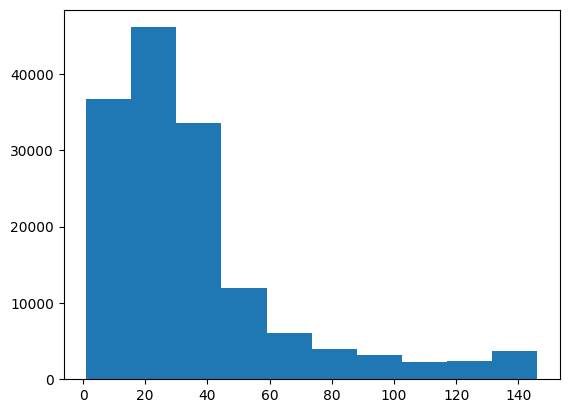

In [71]:
plt.hist(df['document_len']) # 어떤식의 분포를 이루는지 전체 리뷰의 길이를 알 수 있다.

In [72]:
df['label'].value_counts() # 긍부정 컬럼이 있음

0    75173
1    74827
Name: label, dtype: int64

In [73]:
df

,Unnamed: 0,id,document,label,document_1,document_1n,document_2n,document_3n,document_non,findall_docu,findall_num,document_0_5,document_len
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,"[아, 더빙.. 진짜 짜증나네요 목소리]",아 더빙,.,. 진짜 짜증나네요 목소리,4.0,[],[],아 더빙.,19.0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,"[흠...포스터보고, 초딩영화줄....오버연기조차 가볍지 않구나]",흠,.,..포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1.0,[],[],흠...포,33.0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,[너무재밓었다그래서보는것을추천한다],너무재밓었다그래서보는것을추천한다,,,-1.0,[재],[],너무재밓었,17.0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,"[교도소, 이야기구먼 ..솔직히 재미는 없다..평점 조정]",교도소 이야기구먼,.,.솔직히 재미는 없다..평점 조정,10.0,"[재, 미]",[],교도소 이,29.0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,"[사이몬페그의, 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스...",사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,,,-1.0,[],[],사이몬페그,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,"[인간이, 문제지.. 소는 뭔죄인가..]",인간이 문제지,.,. 소는 뭔죄인가..,7.0,[],[],인간이 문,19.0
149996,149996,8549745,평점이 너무 낮아서...,1,"[평점이, 너무 낮아서...]",평점이 너무 낮아서,.,..,10.0,[],[],평점이 너,13.0
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,"[이게, 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?]",이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,,,-1.0,[],[],이게 뭐요,31.0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,"[청춘, 영화의 최고봉.방황과 우울했던 날들의 자화상]",청춘 영화의 최고봉,.,방황과 우울했던 날들의 자화상,10.0,[],[],청춘 영화,27.0


### 필수과제2
- 1. label의 따라서 긍정, 부정일텐데 긍정의 리뷰와 부정의 리뷰에 가장 많은 빈도 단어들은 어떤 것이 있는지? 만들어 주세요!
- 문자열 split 리스트에 넣어서 해도 되고 확인해 주세요!

- 2. 리뷰의 길이에 따른 긍정과 부정, 가장 많은 빈도의 단어는 어떤 것이 있는지 확인해 주세요!